### Ejemplo de ingestión de la API de datos abiertos de CDMX

Utilizaremos el API público [Dog API](https://dog.ceo/dog-api/documentation/breed) que tiene los siguientes endpoints: 

1. Lista de todas las razas
2. Obtener una imagen aleatoria
3. Obtener una imagen de una raza particular
4. Obtener una imagen de una subraza particular
5. Buscar de entre la lista razas

Utilizaremos el endpoint 2 y 3 para ingestar algunas imágenes. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Llamada a la API del endpoint 2: Obtener una imagen aleatoria.

De acuerdo a la documentación de la API, el endpoint que devuelve una imagen aleatoria es: `https://dog.ceo/api/breeds/image/random`. El siguiente código realiza una llamada a este endpoint utilizando el paquete de Python `requests`, esta librería no forma parte de la base de Python por lo que es necesario que instales este paquete con la instrucción `pip install requests`.

In [3]:
import requests

Para hacer un `request` a una API (operación `GET` a la API) necesitas el método `requests.get()` indicando dentro de la función `get()` el endpoint al que quieres hacer la llamada. No todos los APIs funcionan igual, hay APIs que incluyen su propia documentación para comunicarse con ellos. En el caso de la API con la que estamos haciendo este ejemplo es necesario ocupar la librería `request`.

In [4]:
images_1 = requests.get('https://dog.ceo/api/breeds/image/random')

In [6]:
type(images_1)

requests.models.Response

Para obtener la información que obtuvimos a través del `request` solicitamos su formato `json`. Es muy común que la manera de "conversar" con una API sea a través del formato `json`. 

In [7]:
image_json = images_1.json()
image_json

{'message': 'https://images.dog.ceo/breeds/spaniel-blenheim/n02086646_4298.jpg',
 'status': 'success'}

En este caso, dado que no tenemos un archivo `jpg` tendremos que cargarlo remotamente para mostrarlo. 

Para leer esta imagen haremos otra petición `request` solicitando la url con la imagen, dado que esta petición np es la llamada a una API no obtendremos un json, en su lugar solicitaremos el contenido de la url, imprimiendo la salida de la image. 

Para poder leer el cotenido que nos devuelve la petición, haremos uso de la librería `Pillow` y su clase `Image`, así como de la librería `BytesIO` del modulo `io`. Si ya tienes instalado `matplotlib` en tu ambiente virtual es posible que ya tengas intalado Pillow, en caso contrario necesitarás instalar `matplotlib`. 


In [29]:
from PIL import Image
from io import BytesIO
import matplotlib.image as mpimg

In [26]:
img = requests.get(image_json['message'])

In [27]:
img_ = Image.open(BytesIO(img.content))

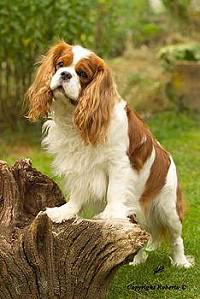

In [32]:
img_

#### Ejemplo con el endpoint 3

De acuerdo a la documentación de [Dog API](https://dog.ceo/dog-api/documentation/breed), para utilizar el endpoint 3 hay que ocupar el siguiente endpoint: `https://dog.ceo/api/breed/>breed>/images`, donde `<breed>` debe ser cambiado por el nombre de una raza en particular, por ejemplo `dachshund`. 

In [35]:
image_1_breed = requests.get('https://dog.ceo/api/breed/dachshund/images')
breed_json = image_1_breed.json()

In [36]:
breed_json

{'message': ['https://images.dog.ceo/breeds/dachshund/Dachshund_rabbit.jpg',
  'https://images.dog.ceo/breeds/dachshund/Daschund-2.jpg',
  'https://images.dog.ceo/breeds/dachshund/Daschund_Wirehair.jpg',
  'https://images.dog.ceo/breeds/dachshund/Dash_Dachshund_With_Hat.jpg',
  'https://images.dog.ceo/breeds/dachshund/Miniature_Daschund.jpg',
  'https://images.dog.ceo/breeds/dachshund/Standard_Wire-hair_Dachshund.jpg',
  'https://images.dog.ceo/breeds/dachshund/Stretched_Dachshund.jpg',
  'https://images.dog.ceo/breeds/dachshund/dachshund-1018409_640.jpg',
  'https://images.dog.ceo/breeds/dachshund/dachshund-123503_640.jpg',
  'https://images.dog.ceo/breeds/dachshund/dachshund-1920_640.jpg',
  'https://images.dog.ceo/breeds/dachshund/dachshund-2033796_640.jpg',
  'https://images.dog.ceo/breeds/dachshund/dachshund-3.jpg',
  'https://images.dog.ceo/breeds/dachshund/dachshund-5.jpg',
  'https://images.dog.ceo/breeds/dachshund/dachshund-6.jpg',
  'https://images.dog.ceo/breeds/dachshund/da

La documentación indica que la respuesta es un arreglo de imágenes que la API tiene de esta raza. 

In [38]:
dachshunds = breed_json['message']

In [44]:
dachshunds

['https://images.dog.ceo/breeds/dachshund/Dachshund_rabbit.jpg',
 'https://images.dog.ceo/breeds/dachshund/Daschund-2.jpg',
 'https://images.dog.ceo/breeds/dachshund/Daschund_Wirehair.jpg',
 'https://images.dog.ceo/breeds/dachshund/Dash_Dachshund_With_Hat.jpg',
 'https://images.dog.ceo/breeds/dachshund/Miniature_Daschund.jpg',
 'https://images.dog.ceo/breeds/dachshund/Standard_Wire-hair_Dachshund.jpg',
 'https://images.dog.ceo/breeds/dachshund/Stretched_Dachshund.jpg',
 'https://images.dog.ceo/breeds/dachshund/dachshund-1018409_640.jpg',
 'https://images.dog.ceo/breeds/dachshund/dachshund-123503_640.jpg',
 'https://images.dog.ceo/breeds/dachshund/dachshund-1920_640.jpg',
 'https://images.dog.ceo/breeds/dachshund/dachshund-2033796_640.jpg',
 'https://images.dog.ceo/breeds/dachshund/dachshund-3.jpg',
 'https://images.dog.ceo/breeds/dachshund/dachshund-5.jpg',
 'https://images.dog.ceo/breeds/dachshund/dachshund-6.jpg',
 'https://images.dog.ceo/breeds/dachshund/dachshund-7.jpg',
 'https://

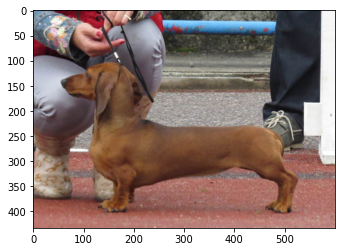

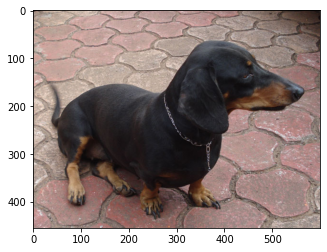

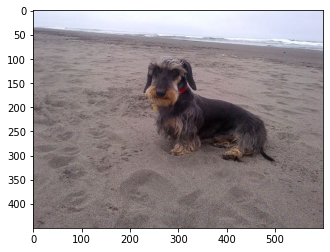

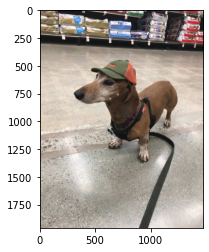

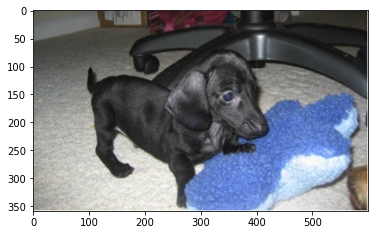

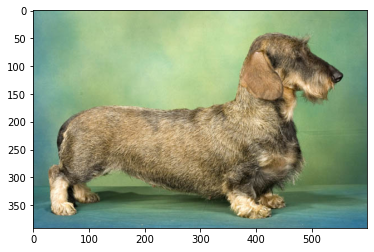

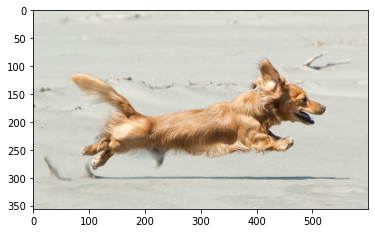

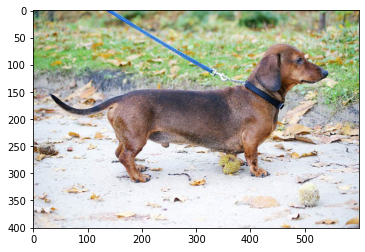

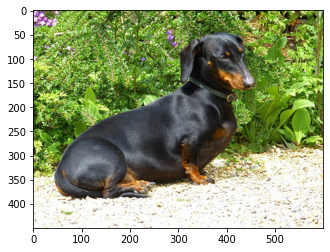

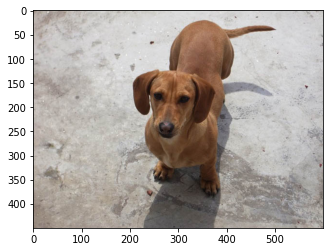

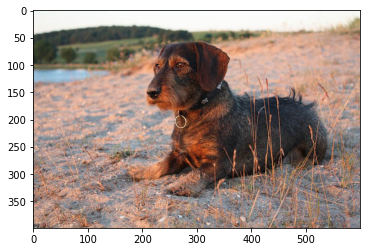

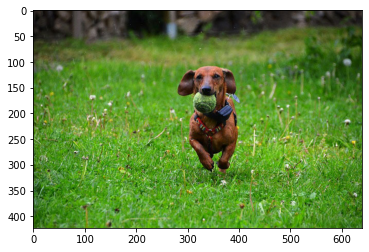

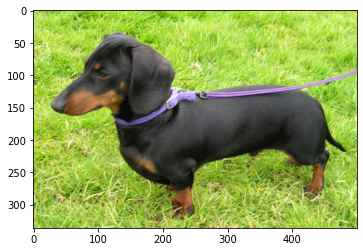

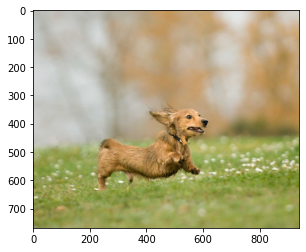

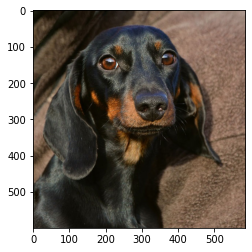

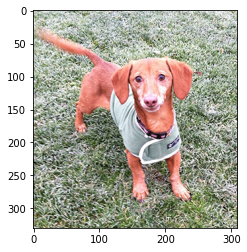

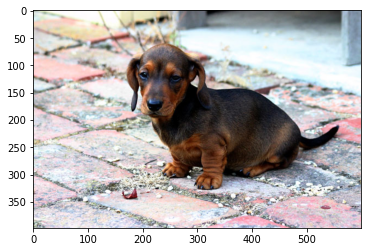

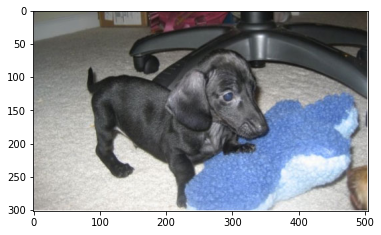

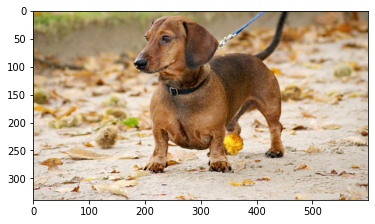

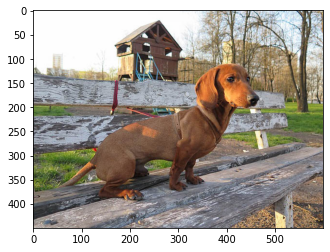

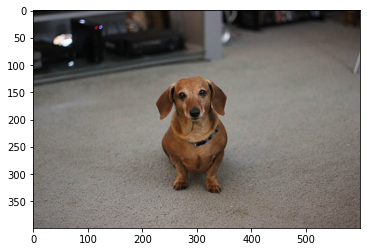

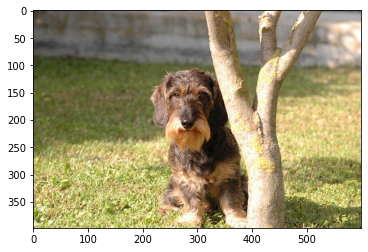

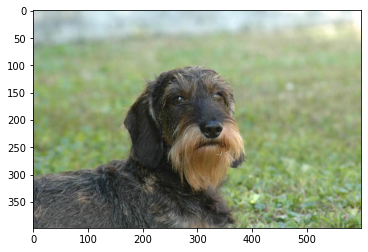

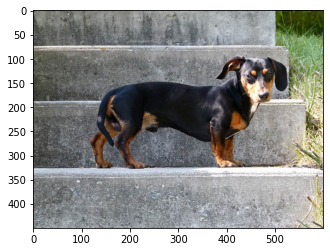

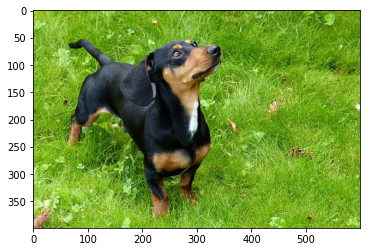

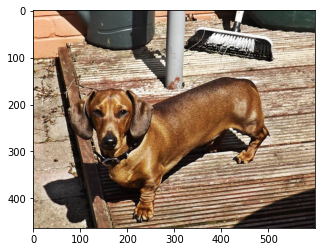

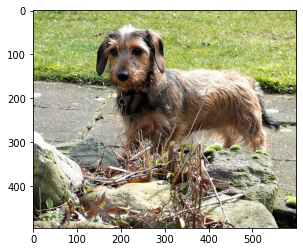

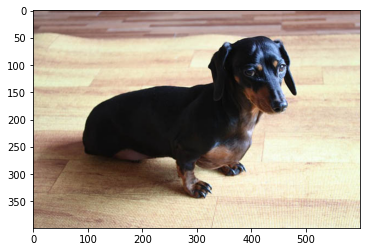

In [50]:
for doc in dachshunds:
    a = requests.get(doc)
    b = Image.open(BytesIO(a.content))
    plt.imshow(b)
    plt.show()
